<a href="https://colab.research.google.com/github/InduwaraGayashan001/EN3150-Assignment-03-CNN/blob/main/Assignment_03_Neural_Nexus_Part_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [16]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm  # Progress bar to monitor the copying process

# Define the base directory and the new directories for train, validation, and test sets
base_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/'
train_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/train'
validation_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/validation'
test_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Lists to hold image data and labels
image_paths = []
labels = []

# Load images from each folder (H1, H2, H3, H5, H6)
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            if filename.endswith('.jpg'):
                # Construct full image path
                image_path = os.path.join(folder_path, filename)
                image_paths.append(image_path)
                labels.append(folder)  # Assign label based on folder name

# Convert labels to a NumPy array
labels = np.array(labels)

In [7]:
# Split data: 60% train, 20% validation, 20% test
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    image_paths, labels, test_size=0.4, random_state=42, stratify=labels
)
validation_paths, test_paths, validation_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

# Print the sizes of the splits
print(f'Training set: {len(train_paths)} images')
print(f'Validation set: {len(validation_paths)} images')
print(f'Test set: {len(test_paths)} images')

# Function to copy images to the relevant directories (train, validation, test)
def copy_images_to_directories(image_paths, labels, split_dir):
    # Create subdirectories for each class in the split directory (train, validation, test)
    for class_name in np.unique(labels):
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

    # Use tqdm to show progress while copying files
    for image_path, label in tqdm(zip(image_paths, labels), total=len(image_paths)):
        # Determine the class directory for the label
        class_dir = os.path.join(split_dir, label)
        # Copy the image to the appropriate class directory
        shutil.copy(image_path, class_dir)

# Copy images to the train, validation, and test directories
print("Copying images to the train directory...")
copy_images_to_directories(train_paths, train_labels, train_dir)

print("Copying images to the validation directory...")
copy_images_to_directories(validation_paths, validation_labels, validation_dir)

print("Copying images to the test directory...")
copy_images_to_directories(test_paths, test_labels, test_dir)

print("Images have been copied to train, validation, and test directories.")

Training set: 5468 images
Validation set: 1823 images
Test set: 1823 images
Copying images to the train directory...


100%|██████████| 5468/5468 [21:34<00:00,  4.22it/s]


Copying images to the validation directory...


100%|██████████| 1823/1823 [07:05<00:00,  4.28it/s]


Copying images to the test directory...


100%|██████████| 1823/1823 [07:17<00:00,  4.16it/s]

Images have been copied to train, validation, and test directories.


In [28]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Paths to your training and validation directories
train_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/train'
validation_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/validation'
test_dir = '/content/drive/My Drive/EN3150-Assignment-03-CNN/Images/test'

# Data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)


Found 5468 images belonging to 5 classes.
Found 1823 images belonging to 5 classes.


In [29]:
# Load pre-trained VGG16 model
base_model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers
x = base_model_vgg.output
x = GlobalAveragePooling2D()(x)
x = Dense(5, activation='softmax')(x)  # Adjust for 5 classes

# Create the full model
model_vgg = Model(inputs=base_model_vgg.input, outputs=x)

# Freeze base model layers
for layer in base_model_vgg.layers:
    layer.trainable = False

# Compile the model
model_vgg.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model from scratch
history_vgg = model_vgg.fit(
    train_generator,
    epochs=20,  # Adjust the total number of epochs as needed
    validation_data=validation_generator,
    verbose=1
)


Epoch 1/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 116s 665ms/step - accuracy: 0.4937 - loss: 1.4625 - val_accuracy: 0.4855 - val_loss: 1.3140
Epoch 2/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 139s 649ms/step - accuracy: 0.4905 - loss: 1.2986 - val_accuracy: 0.4877 - val_loss: 1.2641
Epoch 3/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 112s 648ms/step - accuracy: 0.5078 - loss: 1.2447 - val_accuracy: 0.4937 - val_loss: 1.2356
Epoch 4/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 142s 649ms/step - accuracy: 0.4849 - loss: 1.2470 - val_accuracy: 0.4959 - val_loss: 1.2130
Epoch 5/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 112s 651ms/step - accuracy: 0.5090 - loss: 1.2127 - val_accuracy: 0.5047 - val_loss: 1.1925
Epoch 6/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 143s 653ms/step - accuracy: 0.5134 - loss: 1.1791 - val_accuracy: 0.5080 - val_loss: 1.1748
Epoch 7/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 175s 849ms/step - accuracy: 0.5172 - loss: 1.1639 - val_accuracy: 0.5145 - val_loss: 1.1588
Epoch 8/20
171/171 ━━━━━━━━━━━━━━━━━━━━ 186s 756ms/step - accuracy: 0.5107 -

In [30]:
save_path = '/content/drive/My Drive/models/model_vgg.h5'
model_vgg.save(save_path)
print("VGG Model saved successfully!")

VGG Model saved successfully!


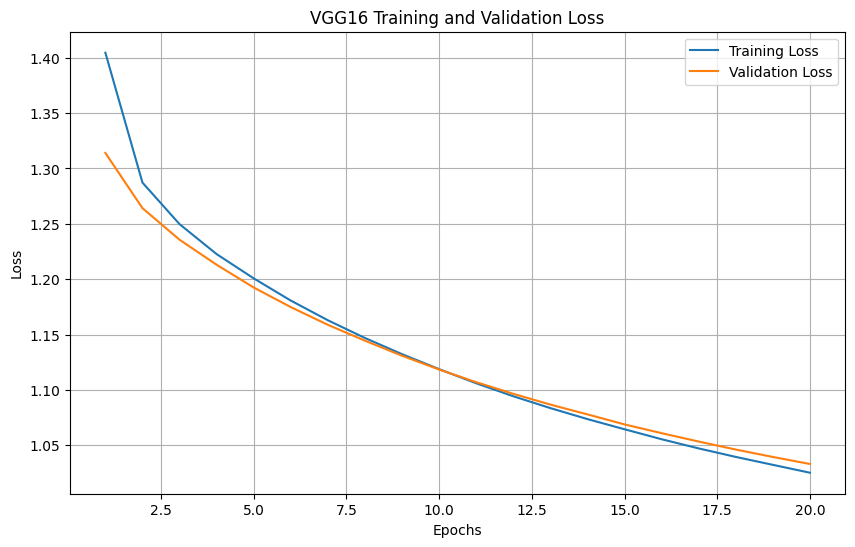

In [31]:
# Plot Training and Validation Loss
train_loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Load test data generator
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

# Evaluate the model on the test data
test_loss, test_accuracy = model_vgg.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

Found 1823 images belonging to 5 classes.
57/57 ━━━━━━━━━━━━━━━━━━━━ 30s 519ms/step - accuracy: 0.7891 - loss: 0.7344
Test Accuracy: 0.58
